In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

df = pd.read_csv('netflix_titles.csv')

print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0  25-Sep-21          2020  PG-13     90 min   
1  24-Sep-21          2021  TV-MA  2 Seasons   
2  24-Sep-21          2021  TV-MA   1 Season   
3  24-Se

In [34]:
df.drop_duplicates(inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [44]:
df = df.copy()

filtered_df = df[(df["country"].fillna("").str.strip() != "")].copy()

filtered_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",9-Mar-16,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [45]:
filtered_df.to_csv('netflix_filtered_titles.csv', index=False)

In [53]:
# "new_netflix_titles.csv" is the reviewed file of "netflix_filtered_titles.csv" in power query

df2 = pd.read_csv('new_netflix_titles.csv')
df2

,title,type,country,date_added,release_year,rating,duration,listed_in,description
0,The Minimalists: Less Is Now,Movie,United States,1/1/2021,2021,TV-14,54 min,Documentaries,They've built a movement out of minimalism. Lo...
1,Men on a Mission,TV Show,South Korea,3/23/2021,2021,TV-14,6 Seasons,International TV Shows,Male celebs play make-believe as high schooler...
2,Men on a Mission,TV Show,South Korea,3/23/2021,2021,TV-14,6 Seasons,Korean TV Shows,Male celebs play make-believe as high schooler...
3,Men on a Mission,TV Show,South Korea,3/23/2021,2021,TV-14,6 Seasons,Stand-Up Comedy & Talk Shows,Male celebs play make-believe as high schooler...
4,Navillera,TV Show,South Korea,3/23/2021,2021,TV-14,1 Season,International TV Shows,A 70-year-old with a dream and a 23-year-old w...
...,...,...,...,...,...,...,...,...,...
21996,Why We Fight: The Battle of Russia,Movie,United States,3/31/2017,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
21997,Prelude to War,Movie,United States,3/31/2017,1942,TV-14,52 min,Classic Movies,Frank Capra's documentary chronicles the rise ...
21998,Prelude to War,Movie,United States,3/31/2017,1942,TV-14,52 min,Documentaries,Frank Capra's documentary chronicles the rise ...
21999,The Battle of Midway,Movie,United States,3/31/2017,1942,TV-14,18 min,Classic Movies,Director John Ford captures combat footage of ...


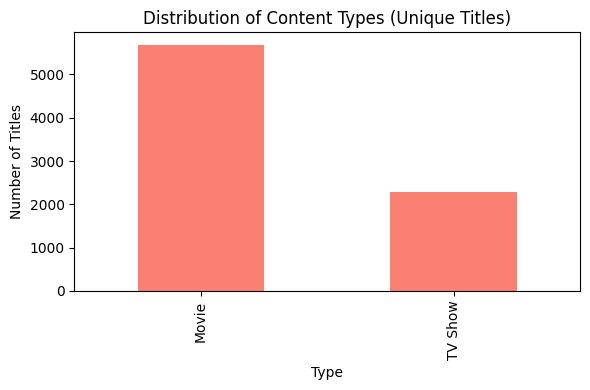

In [55]:
# Delete duplicate
unique_df = df2.drop_duplicates(subset='title')

# Vizualize the number of shows distributed by type
plt.figure(figsize=(6, 4))
unique_df['type'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Content Types (Unique Titles)')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

In [56]:
# SQL interogation. Number of titles by type of show.
conn = sqlite3.connect(':memory:')
df2 = df2[df2['type'].notna()]
df2.to_sql('netflix', conn, index=False, if_exists='replace')

query = """
SELECT type, COUNT(*) AS count
FROM (
    SELECT DISTINCT title, type
    FROM netflix
) AS unique_titles
GROUP BY type
ORDER BY count DESC;

"""

result = pd.read_sql_query(query, conn)
print(result)

      type  count
0    Movie   5687
1  TV Show   2274
